In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
df= pd.read_csv('C:\STUPEN\SCPK\scpk-kip-app\dataset_pendaftar_kip_k.csv')

In [3]:
df.head()

,JenjangPendidikan,KeluargaAfirmasi,AkreditasiPT,AkreditasiProdi,UKT,NilaiIPK,Target
0,D3,Tidak,B,C,2000000,2.50,0
1,S1,Ya,B,B,1000000,3.50,1
2,D2,Tidak,A,B,1500000,2.75,1
3,S2,Tidak,C,B,3000000,3.25,0
4,S1,Ya,A,A,1200000,3.20,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   JenjangPendidikan  54 non-null     object 
 1   KeluargaAfirmasi   54 non-null     object 
 2   AkreditasiPT       54 non-null     object 
 3   AkreditasiProdi    54 non-null     object 
 4   UKT                54 non-null     int64  
 5   NilaiIPK           54 non-null     float64
 6   Target             54 non-null     int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 3.1+ KB


Insight:
1. DataFrame memiliki total 54 entri.
2. Tidak ada nilai null dalam setiap kolom.
3. Terdapat 7 kolom dalam DataFrame atau 7 variabel yaitu JenjangPendidikan, KeluargaAfirmasi, AkreditasiPT, AkreditasiProdi, UKT, NilaiIPK, Target

In [5]:
df.describe()

,UKT,NilaiIPK,Target
count,5.400000e+01,54.000000,54.000000
mean,2.024074e+06,3.251852,0.574074
std,5.273412e+05,0.425481,0.499126
min,1.000000e+06,2.500000,0.000000
25%,1.625000e+06,2.900000,0.000000
50%,2.050000e+06,3.225000,1.000000
75%,2.400000e+06,3.662500,1.000000
max,3.000000e+06,3.950000,1.000000


In [6]:
df.isnull().sum()

JenjangPendidikan    0
KeluargaAfirmasi     0
AkreditasiPT         0
AkreditasiProdi      0
UKT                  0
NilaiIPK             0
Target               0
dtype: int64

In [7]:
map_jenjang_pendidikan = {'S2': 5, 'S1': 4, 'D4': 4, 'D3': 3, 'D2': 2, 'D1': 1}
map_keluarga_afirmasi = {'Ya': 3, 'Tidak': 2}
map_akreditasi_pt = { 'A': 3, 'B': 2, 'C': 1}
map_akreditasi_prodi = {'A': 4, 'B': 3, 'C': 2}

df['JenjangPendidikan'] = df['JenjangPendidikan'].map(map_jenjang_pendidikan)
df['KeluargaAfirmasi'] = df['KeluargaAfirmasi'].map(map_keluarga_afirmasi)
df['AkreditasiPT'] = df['AkreditasiPT'].map(map_akreditasi_pt)
df['AkreditasiProdi'] = df['AkreditasiProdi'].map(map_akreditasi_prodi)

df.head()

,JenjangPendidikan,KeluargaAfirmasi,AkreditasiPT,AkreditasiProdi,UKT,NilaiIPK,Target
0,3,2,2,2,2000000,2.50,0
1,4,3,2,3,1000000,3.50,1
2,2,2,3,3,1500000,2.75,1
3,5,2,1,3,3000000,3.25,0
4,4,3,3,4,1200000,3.20,1


In [8]:
X = df.drop(columns=['Target'])
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Test set: {X_test.shape}, {y_test.shape}")

Training set: (43, 6), (43,)
Test set: (11, 6), (11,)


In [9]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

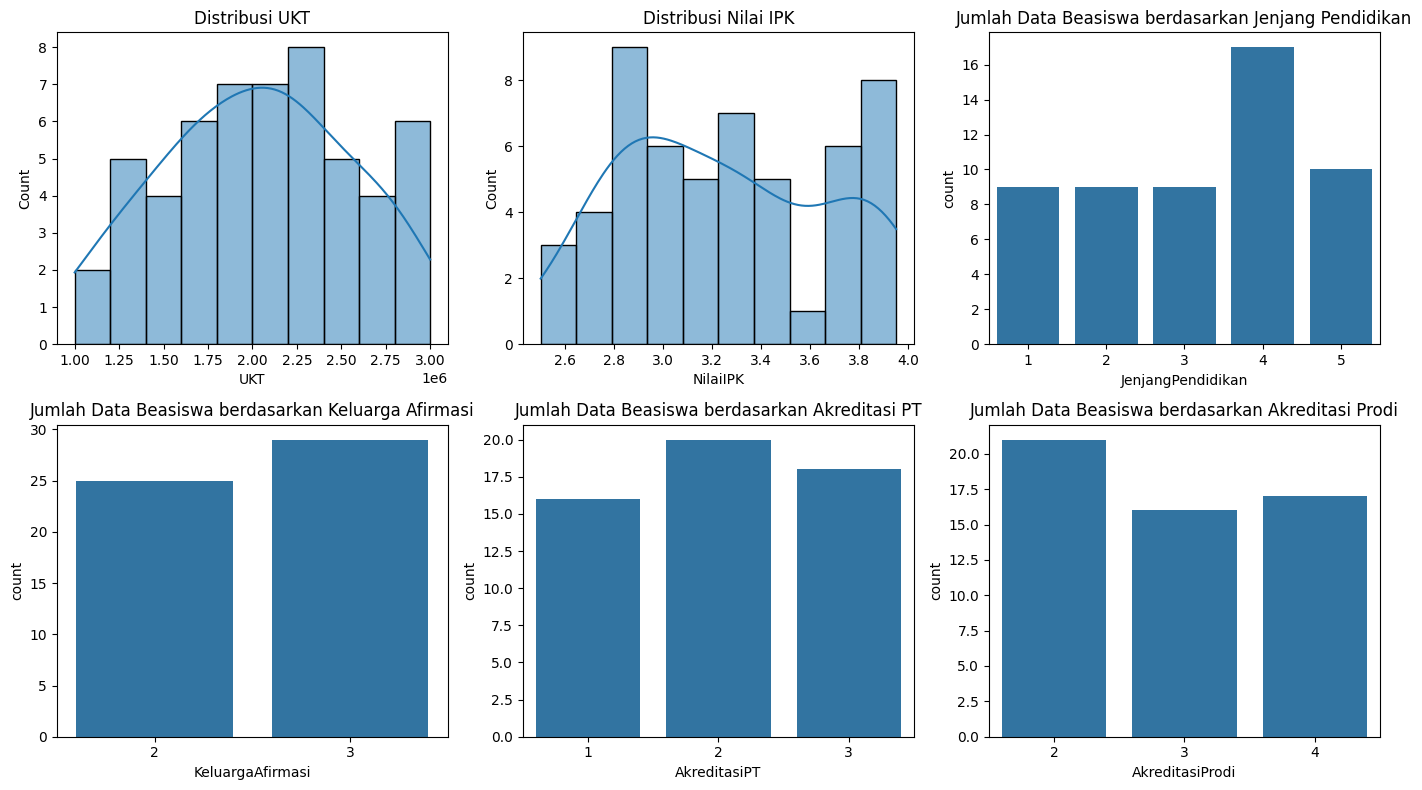

In [10]:
# Histogram untuk variabel numerik
plt.figure(figsize=(14, 8))
plt.subplot(2, 3, 1)
sns.histplot(df['UKT'], bins=10, kde=True)
plt.title('Distribusi UKT')

plt.subplot(2, 3, 2)
sns.histplot(df['NilaiIPK'], bins=10, kde=True)
plt.title('Distribusi Nilai IPK')

# Bar chart untuk variabel kategorikal
plt.subplot(2, 3, 3)
sns.countplot(x='JenjangPendidikan', data=df)
plt.title('Jumlah Data Beasiswa berdasarkan Jenjang Pendidikan')

plt.subplot(2, 3, 4)
sns.countplot(x='KeluargaAfirmasi', data=df)
plt.title('Jumlah Data Beasiswa berdasarkan Keluarga Afirmasi')

plt.subplot(2, 3, 5)
sns.countplot(x='AkreditasiPT', data=df)
plt.title('Jumlah Data Beasiswa berdasarkan Akreditasi PT')

plt.subplot(2, 3, 6)
sns.countplot(x='AkreditasiProdi', data=df)
plt.title('Jumlah Data Beasiswa berdasarkan Akreditasi Prodi')

plt.tight_layout()
plt.show()

# Decision Tree

In [11]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [12]:
y_pred_dt = decision_tree.predict(X_test_scaled)
print(f'Akurasi Decision Tree: {accuracy_score(y_test, y_pred_dt)}')

Akurasi Decision Tree: 0.9090909090909091


In [13]:
from sklearn.metrics import classification_report
print("Classification Report Decision Tree:")
print(classification_report(y_test, y_pred_dt))

Classification Report Decision Tree:
              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.83      1.00      0.91         5

    accuracy                           0.91        11
   macro avg       0.92      0.92      0.91        11
weighted avg       0.92      0.91      0.91        11



In [14]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix Decision Tree:")
print(confusion_matrix(y_test, y_pred_dt))

Confusion Matrix Decision Tree:
[[5 1]
 [0 5]]


# Random Forest

In [15]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [16]:
y_pred_rf = random_forest.predict(X_test_scaled)
print(f'Akurasi Random Forest: {accuracy_score(y_test, y_pred_rf)}')

Akurasi Random Forest: 0.9090909090909091


In [17]:
print("Classification Report Random Forest:")
print(classification_report(y_test, y_pred_rf))

Classification Report Random Forest:
              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.83      1.00      0.91         5

    accuracy                           0.91        11
   macro avg       0.92      0.92      0.91        11
weighted avg       0.92      0.91      0.91        11



In [18]:
print("Confusion Matrix Random Forest:")
print(confusion_matrix(y_test, y_pred_rf))

Confusion Matrix Random Forest:
[[5 1]
 [0 5]]


In [19]:
import joblib

joblib.dump(decision_tree, 'decision_tree_model.pkl')
joblib.dump(random_forest, 'random_forest_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

# Kesimpulan
1. Hasil evaluasi menunjukkan bahwa baik model Decision Tree maupun Random Forest memberikan akurasi yang sama, yaitu sekitar 0.91 (91%).
2. Kedua model memiliki precision yang sangat tinggi untuk kelas 0 dan recall yang sempurna untuk kelas 1, yang berarti model sangat baik dalam mengidentifikasi siapa yang tidak mendapat beasiswa, dan tidak melewatkan siapa yang mendapat beasiswa.
3. Tidak ada kasus yang mendapat beasiswa tetapi diprediksi sebagai tidak mendapat beasiswa, yang sangat positif karena memastikan semua yang berhak mendapatkan beasiswa dikenali dengan benar.
4. F1-score adalah rata-rata harmonis dari precision dan recall, dan nilai 0.91 menunjukkan keseimbangan yang baik antara precision dan recall dan secara keseluruhan memiliki kinerja yang seimbang di kedua kelas.
5. Weighted average juga sekitar 0.91 dan 0.92, yang menunjukkan bahwa ketika mempertimbangkan proporsi masing-masing kelas, kinerja model tetap sangat baik.